<a href="https://colab.research.google.com/github/diegol99/CasoEstudio_Marketing/blob/main/Marketing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Analítica aplicada en RRHH
* Integrantes:
1. Diego Luna Paternina
2. Santiago Gomez Berrio
3. Maria Clara Salazar Duque

## *Lectura de Datos*:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import sqlite3 as sql
import plotly.graph_objects as go ## Para gráficos
import os

#os.getcwd()
#os.chdir('D:\Aplicaciones de la analítica\Proyecto marketing')

# Para ejecutar sql y conectarse a bd

conn = sql.connect('/content/drive/MyDrive/Analitica 3/Marketing/BD/db_movies') ## Crear cuando no existe el nombre cd y conectarse cuando si existe
cur=conn.cursor() # Para funciones que ejecutan sql en base de datos
cur.execute ("SELECT name FROM sqlite_master Where type = 'table';")
print(cur.fetchall())

[('ratings',), ('movies',)]


##*Analisis Exploratorio*:

In [ ]:
movies = pd.read_sql('SELECT * FROM movies', conn)
ratings = pd.read_sql('SELECT * FROM ratings', conn)

In [ ]:
ratings

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [ ]:
from datetime import datetime
ts = int("1584101485")

# Date only
print(datetime.utcfromtimestamp(ts).strftime('%Y-%m-%d'))
def datefromtimestamp(timestamp):
    date = datetime.utcfromtimestamp(timestamp).strftime('%m-%d-%Y')
    return date

2020-03-13


In [ ]:
ratings["timestamp"] = ratings["timestamp"].apply(lambda x: datefromtimestamp(x))
ratings["timestamp"] = pd.to_datetime(ratings["timestamp"])

In [ ]:
#Se revisa si hay datos nulos en la columna de titulos
pd.read_sql('SELECT COUNT(*) as ValoresNull FROM movies WHERE title IS NULL;', conn)

,ValoresNull
0,0


In [ ]:
#Se revisa si hay datos nulos en la columna de generos
pd.read_sql('SELECT COUNT(*) as ValNull FROM movies WHERE genres IS NULL;', conn)

,ValNull
0,0


In [ ]:
#Se revisa si hay calificaciones nulas
pd.read_sql('SELECT COUNT(*) as RaNull FROM ratings WHERE rating IS NULL;', conn) 

,RaNull
0,0


In [ ]:
#Se revisa si hay datos nulos en la columna 
pd.read_sql('SELECT COUNT(*) Ranull FROM ratings WHERE movieId IS NULL;', conn) 

,Ranull
0,0


In [ ]:
#Cuántos registros tiene movies
pd.read_sql('SELECT COUNT(*) as registros FROM movies', conn)

,registros
0,9742


In [ ]:
#Cuántos registros tiene ratings
pd.read_sql('SELECT COUNT(*) as registros FROM ratings', conn)

,registros
0,100836


In [ ]:
##Genero más visto
genvistas = pd.read_sql("""SELECT genres,COUNT(ratings.movieId) as Vistas FROM movies
                            INNER JOIN ratings 
                            ON movies.movieId = ratings.movieId
                            GROUP BY ratings.movieId
                            ORDER BY vistas DESC
                            LIMIT 10;""", conn)
print(genvistas)

                             genres  Vistas
0          Comedy|Drama|Romance|War     329
1                       Crime|Drama     317
2       Comedy|Crime|Drama|Thriller     307
3             Crime|Horror|Thriller     279
4            Action|Sci-Fi|Thriller     278
5           Action|Adventure|Sci-Fi     251
6  Action|Adventure|Sci-Fi|Thriller     238
7                  Action|Drama|War     237
8                     Action|Sci-Fi     224
9                         Drama|War     220


In [ ]:
#### verificar cuantas calificaciones tiene cada pelicula
rating_movies=pd.read_sql(''' SELECT rating, COUNT(*) AS count
FROM ratings
GROUP BY rating  ''',conn )
rating_movies
#####Distribución de calificaciones de las películas:
###Para visualizar cómo se distribuyen las calificaciones de las películas en la base de datos "ratings", puedes utilizar la siguiente consulta:

,rating,count
0,0.5,1370
1,1.0,2811
2,1.5,1791
3,2.0,7551
4,2.5,5550
5,3.0,20047
6,3.5,13136
7,4.0,26818
8,4.5,8551
9,5.0,13211


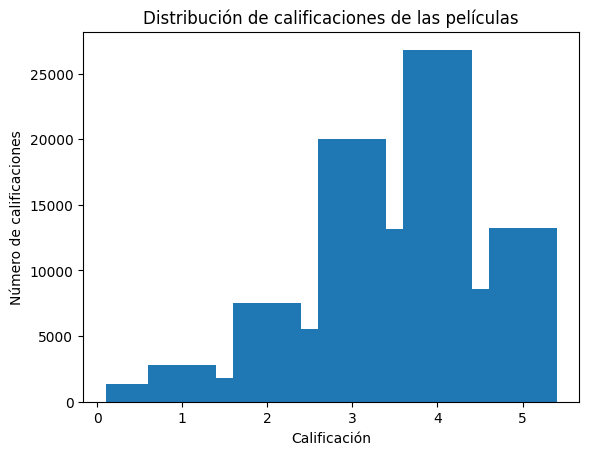

In [ ]:
# Conectar a la base de datos
import matplotlib.pyplot as plt
conn = sql.connect('/content/drive/MyDrive/Analitica 3/Marketing/BD/db_movies')

# Realizar la consulta
cursor = conn.cursor()
cursor.execute("SELECT rating, COUNT(*) AS count FROM ratings GROUP BY rating")
data = cursor.fetchall()

# Crear el gráfico de barras
x = [row[0] for row in data]
y = [row[1] for row in data]
plt.bar(x, y)
plt.xlabel('Calificación')
plt.ylabel('Número de calificaciones')
plt.title('Distribución de calificaciones de las películas')
plt.show()

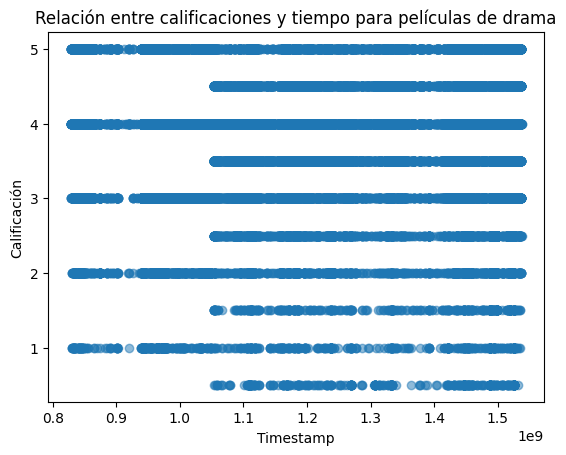

In [ ]:
conn = sql.connect('/content/drive/MyDrive/Analitica 3/Marketing/BD/db_movies')
cursor = conn.cursor()
cursor.execute("SELECT r.rating, r.timestamp FROM ratings r INNER JOIN movies m ON m.movieId = r.movieId WHERE m.genres LIKE '%Drama%'")
data = cursor.fetchall()

# Crear el gráfico de dispersión
x = [row[1] for row in data]
y = [row[0] for row in data]
plt.scatter(x, y, alpha=0.5)
plt.xlabel('Timestamp')
plt.ylabel('Calificación')
plt.title('Relación entre calificaciones y tiempo para películas de drama')
plt.show()

# Cerrar la conexión a la base de datos

## *Serie de tiempo*

In [ ]:
from datetime import datetime
ts = int("1584101485")

# Date only
print(datetime.utcfromtimestamp(ts).strftime('%Y-%m-%d'))
def datefromtimestamp(timestamp):
    date = datetime.utcfromtimestamp(timestamp).strftime('%m-%d-%Y')
    return date

2020-03-13


In [ ]:
movies = pd.read_sql('SELECT * FROM movies', conn)
ratings = pd.read_sql('SELECT * FROM ratings', conn)

In [ ]:
ratings["timestamp"] = ratings["timestamp"].apply(lambda x: datefromtimestamp(x))
ratings["timestamp"] = pd.to_datetime(ratings["timestamp"])

In [ ]:
## Serie de tiempo de los meses en que más se ven peliculas ### si da, sino que toca correr de nuevo la función de la fecha, 
##creo que la de los años la daña
import plotly.express as px
ratings["timestamp"] = ratings["timestamp"].dt.month
retfecha= ratings.groupby(["timestamp"])[["userId"]].count().reset_index()
fig = px.line(retfecha, x='timestamp', y =['userId'], title = '<b>Vistas de películas mensuales<b>',
              color_discrete_sequence=px.colors.qualitative.G10)
fig.update_layout(
    template = 'simple_white',
    title_x = 0.5,
   legend_title = 'Usuarios',
    xaxis_title = '<b>Fecha<b>',
    yaxis_title = '<b>Cantidad de usuarios<b>',
)
fig.show()

## *Sistemas de recomendación basado en popularidad*

In [ ]:
##Peliculas más vistas con su promedio de calificación 
Movievistas = pd.read_sql("""SELECT title,
                            avg(ratings.rating) as avg_rat,
                            COUNT(ratings.movieId) as vistas FROM movies
                            INNER JOIN ratings 
                            ON movies.movieId = ratings.movieId
                            GROUP BY ratings.movieId
                            ORDER BY vistas DESC
                            LIMIT 10;""", conn)
print(Movievistas)

                                       title   avg_rat  vistas
0                        Forrest Gump (1994)  4.164134     329
1           Shawshank Redemption, The (1994)  4.429022     317
2                        Pulp Fiction (1994)  4.197068     307
3           Silence of the Lambs, The (1991)  4.161290     279
4                         Matrix, The (1999)  4.192446     278
5  Star Wars: Episode IV - A New Hope (1977)  4.231076     251
6                       Jurassic Park (1993)  3.750000     238
7                          Braveheart (1995)  4.031646     237
8          Terminator 2: Judgment Day (1991)  3.970982     224
9                    Schindler's List (1993)  4.225000     220


In [ ]:
## 10 Generos Más calificado
gencal = pd.read_sql("""SELECT genres,count(ratings.rating) as MasCalif FROM movies
                            INNER JOIN ratings 
                            ON movies.movieId = ratings.movieId
                            GROUP BY genres
                            ORDER BY MasCalif DESC
                            LIMIT 10;""", conn)
print(gencal)

                      genres  MasCalif
0                     Comedy      7196
1                      Drama      6291
2             Comedy|Romance      3967
3       Comedy|Drama|Romance      3000
4               Comedy|Drama      2851
5              Drama|Romance      2838
6    Action|Adventure|Sci-Fi      2361
7                Crime|Drama      2315
8      Action|Crime|Thriller      1554
9  Action|Adventure|Thriller      1455


In [ ]:
##Genero con mejor calificacion
genecal = pd.read_sql("""SELECT genres,Avg(ratings.rating) as MejorCalif FROM movies
                            INNER JOIN ratings 
                            ON movies.movieId = ratings.movieId
                            GROUP BY genres
                            ORDER BY MejorCalif DESC
                            LIMIT 10;""", conn)
print(genecal)

                                 genres  MejorCalif
0               Fantasy|Mystery|Western         5.0
1                  Drama|Horror|Romance         5.0
2  Drama|Fantasy|Musical|Mystery|Sci-Fi         5.0
3                 Comedy|Horror|Mystery         5.0
4  Comedy|Drama|Fantasy|Mystery|Romance         5.0
5                  Comedy|Crime|Fantasy         5.0
6             Comedy|Crime|Drama|Horror         5.0
7           Animation|Drama|Sci-Fi|IMAX         5.0
8       Animation|Drama|Fantasy|Mystery         5.0
9                 Animation|Crime|Drama         5.0


In [ ]:
## 10 peliculas mejor calificadas
topdiezmovie = pd.read_sql("""SELECT title,Avg(ratings.rating) as MejorCalif FROM movies
                            INNER JOIN ratings 
                            ON movies.movieId = ratings.movieId
                            GROUP BY genres
                            ORDER BY MejorCalif DESC
                            LIMIT 10;""", conn)
print(topdiezmovie)

                           title  MejorCalif
0      7 Faces of Dr. Lao (1964)         5.0
1  Only Lovers Left Alive (2013)         5.0
2             Holy Motors (2012)         5.0
3              The Editor (2015)         5.0
4                      PK (2014)         5.0
5            L.A. Slasher (2015)         5.0
6              Ex Drummer (2007)         5.0
7                    More (1998)         5.0
8    Colourful (Karafuru) (2010)         5.0
9          Loving Vincent (2017)         5.0


In [ ]:
## Serie de tiempo de las vistas de las peliculas
import plotly.express as px
ratings["timestamp"] = ratings["timestamp"].dt.year
retfecha= ratings.groupby(["timestamp"])[["userId"]].count().reset_index()
fig = px.line(retfecha, x='timestamp', y =['userId'], title = '<b>Vistas de peliculas a traves del tiempo<b>',
              color_discrete_sequence=px.colors.qualitative.G10)
fig.update_layout(
    template = 'simple_white',
    title_x = 0.5,
   legend_title = 'Usuarios',
    xaxis_title = '<b>Fecha<b>',
    yaxis_title = '<b>Cantidad de usuarios<b>',
)
fig.show()

In [ ]:
##Usuarios si vieron más de una pelicula
vistasusuario = pd.read_sql("""SELECT userId, COUNT(DISTINCT movieID) as NumVistas FROM ratings
                            GROUP BY userId
                            ORDER BY NumVistas DESC
                            LIMIT 10;""", conn)
print(vistasusuario)

   userId  NumVistas
0     414       2698
1     599       2478
2     474       2108
3     448       1864
4     274       1346
5     610       1302
6      68       1260
7     380       1218
8     606       1115
9     288       1055


In [ ]:
##Promedio de calificación por Usuario
vistasusuario = pd.read_sql("""SELECT userId, COUNT(DISTINCT movieId) as NumVistas, 
                            Avg(ratings.rating) as PromCalif FROM ratings
                            GROUP BY userId
                            HAVING NumVistas  
                            ORDER BY PromCalif DESC
                            LIMIT 10;""", conn)
print(vistasusuario)

   userId  NumVistas  PromCalif
0      53         20   5.000000
1     251         23   4.869565
2     515         26   4.846154
3      25         26   4.807692
4      30         34   4.735294
5     523         75   4.693333
6     348         55   4.672727
7     171         82   4.634146
8     452        202   4.556931
9      43        114   4.552632


In [ ]:
##En que año se estrenaron las peliculas, y cuales fueron mejor calificadas 
estreno = pd.read_sql("""SELECT SUBSTR(title, -1, -4) as ano_estreno, SUBSTR(title, -7,-60) as titulo,
                          avg(ratings.rating) as avg_rat,
                          COUNT(ratings.movieId) as vistas FROM movies
                          INNER JOIN ratings 
                          ON movies.movieId = ratings.movieId
                          GROUP BY ano_estreno
                          HAVING vistas >= 50
                          ORDER BY avg_rat DESC
                          LIMIT 10;""", conn)
print(estreno)

  ano_estreno                                             titulo   avg_rat  \
0        1944                                           Gaslight  4.043478   
1        1957                                         Funny Face  4.039535   
2        1954                                        Rear Window  4.009191   
3        1962                                 Lawrence of Arabia  3.969466   
4        1952                                Singin' in the Rain  3.953125   
5        1946                                          Notorious  3.949275   
6        1964  Umbrellas of Cherbourg, The (Parapluies de Che...  3.940160   
7        1972                                     Godfather, The  3.939891   
8        1974                                 Herbie Rides Again  3.935622   
9        1967                  Beauty of the Day (Belle de jour)  3.922572   

   vistas  
0      92  
1     215  
2     272  
3     262  
4      96  
5     138  
6     376  
7     366  
8     466  
9     381  


## *Sistemas de recomendación contenido general*

In [ ]:
#juntar tablas 
moviescompleta =pd.read_sql("""SELECT movies.movieId,title,
                            avg(ratings.rating) as avg_rat,
                            COUNT(ratings.movieId) as vistas,
                            movies.genres FROM movies
                            INNER JOIN ratings 
                            ON movies.movieId = ratings.movieId
                            GROUP BY ratings.movieId
                            ORDER BY vistas DESC
                            ;""", conn)
moviescompleta.head(10)

,movieId,title,avg_rat,vistas,genres
0,356,Forrest Gump (1994),4.164134,329,Comedy|Drama|Romance|War
1,318,"Shawshank Redemption, The (1994)",4.429022,317,Crime|Drama
2,296,Pulp Fiction (1994),4.197068,307,Comedy|Crime|Drama|Thriller
3,593,"Silence of the Lambs, The (1991)",4.161290,279,Crime|Horror|Thriller
4,2571,"Matrix, The (1999)",4.192446,278,Action|Sci-Fi|Thriller
5,260,Star Wars: Episode IV - A New Hope (1977),4.231076,251,Action|Adventure|Sci-Fi
6,480,Jurassic Park (1993),3.750000,238,Action|Adventure|Sci-Fi|Thriller
7,110,Braveheart (1995),4.031646,237,Action|Drama|War
8,589,Terminator 2: Judgment Day (1991),3.970982,224,Action|Sci-Fi
9,527,Schindler's List (1993),4.225000,220,Drama|War


In [ ]:
#verificar que no se dupliquen ###Pero se vuelve a cambiar la fecha####
moviescompleta.duplicated().sum()

0

In [ ]:
moviescompleta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9724 entries, 0 to 9723
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  9724 non-null   int64  
 1   title    9724 non-null   object 
 2   avg_rat  9724 non-null   float64
 3   vistas   9724 non-null   int64  
 4   genres   9724 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 380.0+ KB


In [ ]:
import re
def clean_title(title):
    return re.sub("[\(\[].*?[\)\]]", "",title)

def genre(series):
    genres = series.index[6:-2]
    
    text = []
    for i in genres:
        if series[i] == 1:
            text.append(i)
            break
    return ", ".join(text)

In [ ]:
moviescompleta["title"] = moviescompleta["title"].apply(clean_title)

In [ ]:
moviescompleta["title"].unique()

array(['Forrest Gump ', 'Shawshank Redemption, The ', 'Pulp Fiction ',
       ..., 'Nico Icon ', 'Georgia ', 'When Night Is Falling '],
      dtype=object)

In [ ]:
#Separar los géneros en categorías 
from mlxtend.preprocessing import TransactionEncoder
genres_1=moviescompleta['genres'].str.split('|')
te =  TransactionEncoder()
genres_1 =te.fit_transform(genres_1)
genres_1 = pd.DataFrame(genres_1, columns = te.columns_)

In [ ]:
#Juntar los generos a la tabla completa
moviescompleta_1=pd.concat([moviescompleta,genres_1], axis=1)
del moviescompleta_1['genres']
moviescompleta_1

,movieId,title,avg_rat,vistas,(no genres listed),Action,Adventure,Animation,Children,Comedy,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,356,Forrest Gump,4.164134,329,False,False,False,False,False,True,...,False,False,False,False,False,True,False,False,True,False
1,318,"Shawshank Redemption, The",4.429022,317,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,296,Pulp Fiction,4.197068,307,False,False,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
3,593,"Silence of the Lambs, The",4.161290,279,False,False,False,False,False,False,...,False,True,False,False,False,False,False,True,False,False
4,2571,"Matrix, The",4.192446,278,False,True,False,False,False,False,...,False,False,False,False,False,False,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9719,96,In the Bleak Midwinter,3.500000,1,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
9720,83,Once Upon a Time... When We Were Colored,3.000000,1,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
9721,77,Nico Icon,4.000000,1,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9722,55,Georgia,4.000000,1,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False



## *Sistema de recomendación filtro colaborativo basado en la pelicula*

In [ ]:
movie='Toy Story '
ind_movie=moviescompleta[moviescompleta['title']==movie].index.values.astype(int)[0] ##Indice del libro
correlaciones=genres_1.corrwith(genres_1.iloc[ind_movie,:],axis=1) ##Matriz de correlaciones
correlaciones.sort_values(ascending=False)

2122    1.000000
7493    1.000000
7846    1.000000
517     1.000000
7257    1.000000
          ...   
6939   -0.333333
1023   -0.333333
552    -0.377964
930    -0.377964
50     -0.423659
Length: 9724, dtype: float64

In [ ]:
def recomendacion(movie = list(moviescompleta['title'].unique())):
     
    ind_movie=moviescompleta[moviescompleta['title']==movie].index.values.astype(int)[0]
    similar_movie = genres_1.corrwith(genres_1.iloc[ind_movie,:],axis=1)
    similar_movie = similar_movie.sort_values(ascending=False)
    top_similar_movie=similar_movie.to_frame(name="correlación").iloc[0:11,]
    top_similar_movie['title']=moviescompleta["title"]
    
    return top_similar_movie

In [ ]:
from ipywidgets import interact ## para análisis interactivo

In [ ]:
print(interact(recomendacion))

interactive(children=(Dropdown(description='movie', options=('Forrest Gump ', 'Shawshank Redemption, The ', 'P…

<function recomendacion at 0x7f76f55d6b80>


## *Sistema de recomendación basado en contenido KNN*:

In [ ]:
from sklearn import neighbors
from ipywidgets import interact
model = neighbors.NearestNeighbors(n_neighbors=11, metric='cosine')
model.fit(genres_1)
dist, idlist = model.kneighbors(genres_1)

distancias=pd.DataFrame(dist)
id_list=pd.DataFrame(idlist)
movie_name='Toy Story '
def MovieRecommender(movie_name = list(moviescompleta['title'].value_counts().index)):
    movie_list_name = []
    movie_id = genres_1[moviescompleta['title'] == movie_name].index
    movie_id = movie_id[0]
    for newid in idlist[movie_id]:
        movie_list_name.append(moviescompleta.loc[newid].title)
    return movie_list_name

print(interact(MovieRecommender))

interactive(children=(Dropdown(description='movie_name', options=('Hamlet ', 'Three Musketeers, The ', 'Miséra…

<function MovieRecommender at 0x7f76ef073940>


## *Sistema de recomendación filtro colaborativo basado en el usuario*:

In [ ]:
ratings.to_sql("usuarios",conn)
conn=sql.connect('usuarios')
cur=conn.cursor()
ratings=pd.read_sql('select * from usuarios', conn)
watcher = Reader(rating_scale=(0, 10))
     

data   = Dataset.load_from_df(ratings[['userId','movieId','rating']], watcher)
     

models=[KNNBasic(),KNNWithMeans(),KNNWithZScore(),KNNBaseline()] 
results = {}
     

for model in models:
 
    CV_scores = cross_validate(model, data, measures=["MAE","RMSE"], cv=5, n_jobs=-1)  
    result = pd.DataFrame.from_dict(CV_scores).mean(axis=0).\
             rename({'test_mae':'MAE', 'test_rmse': 'RMSE'})
    results[str(model).split("algorithms.")[1].split("object ")[0]] = result


performance_df = pd.DataFrame.from_dict(results).T
performance_df.sort_values(by='RMSE')

,MAE,RMSE,fit_time,test_time
knns.KNNBaseline,0.669805,0.877023,0.313341,3.464305
knns.KNNWithZScore,0.680454,0.897183,0.273264,2.307856
knns.KNNWithMeans,0.686855,0.898968,0.206896,2.869600
knns.KNNBasic,0.726747,0.947801,0.265874,3.852952


In [ ]:
param_grid = { 'sim_options' : {'name': ['msd','cosine','pearson', 'pearson_baseline'], 
                               'min_support': [1,3,5,7,9],         ### Vecinos minimos necesarios para realixar la predicción  ###Agregar mas agrupaciones
                                'user_based': [False, True]}  ### Basado en usuario (True) o en el items/calificaciones (False)
             }

gridsearchKNNBasic = GridSearchCV(KNNBasic, param_grid, measures=['mae'], \
                                      cv=2, n_jobs=2)
                                    
gridsearchKNNBasic.fit(data)

In [ ]:
gridsearchKNNBasic.best_params["mae"]

{'sim_options': {'name': 'msd', 'min_support': 1, 'user_based': False}}

In [ ]:
gridsearchKNNBasic.best_score["mae"]

0.7101048001376664

## *Sistema de recomendación por filtros y contenidos*

Creamos una función llamada show_recommendations() que se ejecuta cada vez que se selecciona un usuario en la lista desplegable. Esta función utiliza el ID del usuario seleccionado para obtener las 15 películas con la calificación más alta para ese usuario y las muestra en la pantalla.

Finalmente, asociamos la función show_recommendations() a la lista desplegable de usuarios utilizando el método observe() de ipywidgets.

In [ ]:
import sqlite3
import ipywidgets as widgets
from IPython.display import display

# Conectar a la base de datos
conn = sql.connect('/content/drive/MyDrive/Analitica 3/Marketing/BD/db_movies')

# Obtener la lista de usuarios
cursor = conn.cursor()
cursor.execute("SELECT DISTINCT UserId FROM ratings")
users = sorted([str(row[0]) for row in cursor.fetchall()])

# Crear la lista desplegable de usuarios
user_dropdown = widgets.Dropdown(options=users, description='Usuario:')

# Crear el widget de texto para mostrar las recomendaciones
recommendations_text = widgets.HTML()

# Función para mostrar las recomendaciones para el usuario seleccionado
def show_recommendations(sender):
    # Obtener el ID del usuario seleccionado
    user_id = user_dropdown.value
    
    # Obtener las recomendaciones para el usuario
    cursor = conn.cursor()
    cursor.execute("SELECT title FROM movies WHERE movieId IN ({})".format(
        "SELECT movieId FROM ratings WHERE UserId = {} ORDER BY rating DESC LIMIT 15".format(user_id)))
    recommendations = [row[0] for row in cursor.fetchall()]

    # Crear una cadena HTML que contenga las recomendaciones
    html = "<ul>"
    for title in recommendations:
        html += "<li>{}</li>".format(title)
    html += "</ul>"
    
    # Actualizar el widget de texto con las recomendaciones
    recommendations_text.value = html

# Asociar la función show_recommendations a la lista desplegable de usuarios
user_dropdown.observe(show_recommendations, 'value')

# Mostrar la lista desplegable de usuarios y el widget de texto de recomendaciones
display(user_dropdown)
display(recommendations_text)

Dropdown(description='Usuario:', options=('1', '10', '100', '101', '102', '103', '104', '105', '106', '107', '…

HTML(value='')

In [ ]:
import sqlite3
import pandas as pd
import ipywidgets as widgets
from IPython.display import display

# Conectar a la base de datos
conn = sql.connect('/content/drive/MyDrive/Analitica 3/Marketing/BD/db_movies')

# Obtener la lista de películas
movies = pd.read_sql_query("SELECT * FROM movies", conn)
movie_dropdown = widgets.Dropdown(options=list(movies['title']), description='Película:')

# Crear la tabla para mostrar las películas similares
similar_movies_table = widgets.HTML()

# Función para mostrar las películas similares a la película seleccionada
def show_similar_movies(sender):
    # Obtener la película seleccionada
    movie_title = movie_dropdown.value
    
    # Obtener las películas similares
    def content_based_recommendation(movie_id, top_n=15):
    # Obtener los vectores de características de la película seleccionada
      query = '''
        SELECT features
        FROM movie_features
        WHERE movieId = ?
      '''
      cur.execute(query, (movie_id,))
      selected_features = cur.fetchone()[0]

    # Calcular la similitud entre la película seleccionada y todas las demás películas
      query = '''
        SELECT movieId, features
        FROM movie_features
    '''
      cur.execute(query)
      similarities = []
    for row in cur.fetchall():
        movie_id, features = row
        similarity = cosine_similarity(selected_features, features)
        similarities.append((movie_id, similarity))

    # Ordenar las películas por similitud y devolver las top_n más similares
    similarities.sort(key=lambda x: x[1], reverse=True)
    recommendations = similarities[1:top_n+1]
    return recommendations
    @app.route('/content-based-recommendation')
    def content_based():
    # Obtener una lista de todas las películas
      query = '''
        SELECT movieId, title
        FROM movies
        ORDER BY title ASC
      '''
      cur.execute(query)
      movies = cur.fetchall()

    # Mostrar una lista desplegable de todas las películas
      html = '''
        <form>
            <div class="form-group">
                <label for="movie-select">Selecciona una película:</label>
                <select class="form-control" id="movie-select" name="movie_id">
      '''
      for movie in movies:
        html += f'<option value="{movie[0]}">{movie[1]}</option>'
      html += '''
                </select>
            </div>
            <button type="submit" class="btn btn-primary">Obtener recomendaciones</button>
        </form>
    '''

    # Si se ha enviado el formulario, obtener las recomendaciones y mostrarlas
    if 'movie_id' in request.args:
        movie_id = int(request.args['movie_id'])
        recommendations = content_based_recommendation(movie_id)
        html += '<h2>Recomendaciones:</h2>'
        for rec in recommendations:
            html += f'<p>{get_movie_title(rec[0])}</p>'

    return html
    print(similar_movies)


In [ ]:
import sqlite3

# Conectar a la base de datos
conn = sql.connect('/content/drive/MyDrive/Analitica 3/Marketing/BD/db_movies')
c = conn.cursor()

# Seleccionar los géneros
c.execute("SELECT genres FROM movies")
genres = c.fetchall()

# Crear un conjunto de géneros únicos
unique_genres = set()
for g in genres:
    for genre in g[0].split('|'):
        unique_genres.add(genre)

# Convertir el conjunto de géneros únicos en una lista
unique_genres = list(unique_genres)

# Mostrar los géneros únicos
print("Lista de géneros disponibles:")
for i, genre in enumerate(unique_genres):
    print(f"{i+1}. {genre}")

# Seleccionar el género
genre_num = int(input("Seleccione el número correspondiente al género: "))
selected_genre = unique_genres[genre_num - 1]

# Mostrar las películas recomendadas
c.execute("""
    SELECT m.title, AVG(r.rating) AS avg_rating
    FROM movies m
    JOIN ratings r ON m.movieId = r.movieId
    WHERE m.genres LIKE ?
    GROUP BY m.movieId
    ORDER BY avg_rating DESC
    LIMIT 10
""", ('%'+selected_genre+'%',))

recommended_movies = c.fetchall()
print(f"\nLas 10 películas más recomendadas del género '{selected_genre}':")
for movie in recommended_movies:
    print(f"- {movie[0]} (rating promedio: {movie[1]:.2f})")
    

Lista de géneros disponibles:
1. Sci-Fi
2. Thriller
3. Crime
4. Horror
5. War
6. Documentary
7. Animation
8. Adventure
9. Musical
10. Children
11. Comedy
12. Romance
13. Western
14. Fantasy
15. IMAX
16. Drama
17. (no genres listed)
18. Action
19. Mystery
20. Film-Noir
Seleccione el número correspondiente al género: 20

Las 10 películas más recomendadas del género 'Film-Noir':
- Rififi (Du rififi chez les hommes) (1955) (rating promedio: 4.75)
- Long Goodbye, The (1973) (rating promedio: 4.67)
- 13 Tzameti (2005) (rating promedio: 4.50)
- You Only Live Once (1937) (rating promedio: 4.50)
- Laura (1944) (rating promedio: 4.33)
- Sunset Blvd. (a.k.a. Sunset Boulevard) (1950) (rating promedio: 4.33)
- Double Indemnity (1944) (rating promedio: 4.32)
- Touch of Evil (1958) (rating promedio: 4.26)
- Notorious (1946) (rating promedio: 4.25)
- Third Man, The (1949) (rating promedio: 4.23)


Este código primero obtiene todos los géneros de la base de datos y crea un conjunto de géneros únicos. Luego, muestra una lista de géneros disponibles y le pide al usuario que seleccione el número correspondiente al género que le interesa. Después de que el usuario selecciona el género, el código ejecuta una consulta SQL para obtener las 10 películas más recomendadas del género seleccionado. Finalmente, muestra los resultados al usuario.